In [36]:
''' Let's first import our dependency and read the data'''
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
''' Finding the unique values for fuel type , owner , transmission and seller type column'''
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [28]:
'''Lets also try to find out how many type of cars we have in the data'''
print('The total number of type of cars in the data is...')
print(len(df['Car_Name'].unique()))

The total number of type of cars in the data is...
98


In [29]:
''' Lets check the missing values in the data '''
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [30]:
''' Let's check the description of the data'''
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [31]:
''' Let's check the maximum and minimum selling price'''
print(max(df['Selling_Price']))
print(min(df['Selling_Price']))

35.0
0.1


In [32]:
'''Let's check the shape of the data'''
df.shape

(301, 9)

In [33]:
''' We can see that in the year column the car manufacturing year is written. Now based on that 
we can derive a column that will state how old the cars are. It simply will substract the year present
in the data with the current year'''
df['Car_Age'] = 2022 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [34]:
'''Now we can drop the year column from our data'''
df.drop(['Year'],axis = 1, inplace= True)


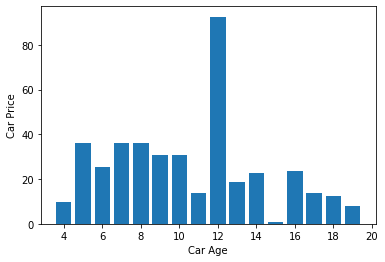

In [45]:
'''Lets find relation between car age and price'''
plt.bar(df['Car_Age'],df['Present_Price'])
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.show()

In [40]:
'''Let's find out how each car's sell value increased'''
df['Value_Growth'] = df['Present_Price'] - df['Selling_Price']

In [41]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Value_Growth
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8,2.24
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9,4.79
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5,2.60
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11,1.30
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8,2.27


In [42]:
'''Lets find out what type of car is mostly present in our dataset'''
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

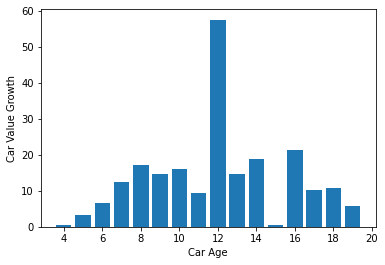

In [46]:
'''Lets draw a relationship between value growth and car age'''
plt.bar(df['Car_Age'],df['Value_Growth'])
plt.xlabel('Car Age')
plt.ylabel('Car Value Growth')
plt.show()

In [51]:
'''We can see that in both viz that the cars aged 12 has highest value growth , let's get the car names'''
car_12 = df[(df['Car_Age']==12)]
car_12.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Value_Growth
19,sx4,2.65,7.98,41442,Petrol,Dealer,Manual,0,12,5.33
28,alto k10,1.95,3.95,44542,Petrol,Dealer,Manual,0,12,2.00
57,corolla altis,4.75,18.54,50000,Petrol,Dealer,Manual,0,12,13.79
67,fortuner,9.25,20.45,59000,Diesel,Dealer,Manual,0,12,11.20
78,corolla altis,5.25,22.83,80000,Petrol,Dealer,Automatic,0,12,17.58
